In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.neural_network as nn
import sklearn.preprocessing as pre
import sklearn.metrics as mt

In [2]:
def generate_data(n):
    
    #prva klasa
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    
    #x1_1 = .21*(6.*np.random.standard_normal((n1,1)));
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
    #druga klasa
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    data = np.concatenate((temp1,temp2),axis = 0)
    
    #permutiraj podatke
    indices = np.random.permutation(n)
    data = data[indices,:]
    
    return data

def plot_confusion_matrix(c_matrix):
    
    norm_conf = []
    for i in c_matrix:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')

    width = len(c_matrix)
    height = len(c_matrix[0])

    for x in range(width):
        for y in range(height):
            ax.annotate(str(c_matrix[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center', color = 'green', size = 20)

    fig.colorbar(res)
    numbers = '0123456789'
    plt.xticks(range(width), numbers[:width])
    plt.yticks(range(height), numbers[:height])
    
    plt.ylabel('Stvarna klasa')
    plt.title('Predvideno modelom')
    plt.show()

In [3]:
data = generate_data(500)
test_n = 100
train = data[0:-test_n]
test = data[-test_n:]
train_X = train[:, 0:2]
train_Y = train[:, 2]
train_X = pre.normalize(train_X)

test_X = test[:, 0:2]
test_X = pre.normalize(test_X)
test_Y = test[:, 2]



For network size 100, random state 0


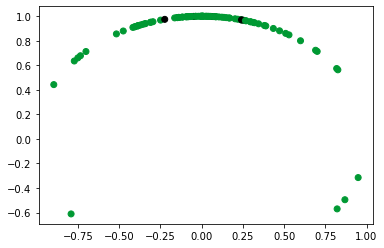

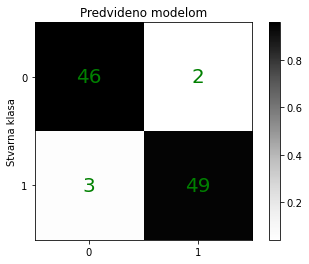

Accuracy = 0.95
Missclacification rate = 0.050000000000000044
Precision = 0.9607843137254902
Recall = 0.9423076923076923
Specificity = 0.9583333333333334


For network size (50, 50), random state 2


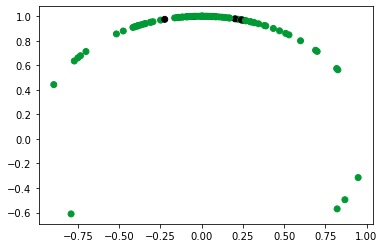

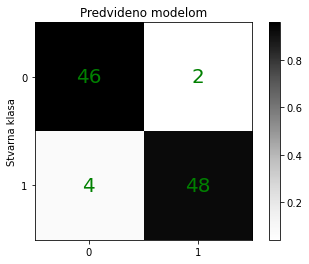

Accuracy = 0.94
Missclacification rate = 0.06000000000000005
Precision = 0.96
Recall = 0.9230769230769231
Specificity = 0.9583333333333334


For network size (20, 20, 20), random state 3


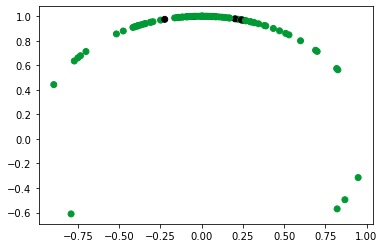

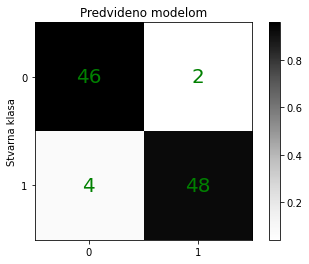

Accuracy = 0.94
Missclacification rate = 0.06000000000000005
Precision = 0.96
Recall = 0.9230769230769231
Specificity = 0.9583333333333334


In [11]:
network = [((100), 0), ((50,50), 2), ((20, 20, 20), 3)]
for x in network:
    print("\n\nFor network size {}, random state {}".format(x[0], x[1]))
    mlp = nn.MLPClassifier(x[0], max_iter=1000, random_state=x[1])
    mlp.fit(train_X, train_Y)
    prediction = mlp.predict(test_X)
    zipped = list(zip(test_Y, prediction))
    color = list(map(lambda x: '#009933' if(x[0] == x[1]) else '#000000', zipped))
    plt.scatter(test_X[:, 0], test_X[:, 1], c=color)
    plt.show()
    conf_matrix = mt.confusion_matrix(test_Y, prediction)
    plot_confusion_matrix(conf_matrix)
    accuracy = mt.accuracy_score(test_Y, prediction)
    missclasification = 1-accuracy
    precision = mt.precision_score(test_Y, prediction)
    recall = mt.recall_score(test_Y, prediction)
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn+fp)
    print("Accuracy = {}".format(accuracy))
    print("Missclacification rate = {}".format(missclasification))
    print("Precision = {}".format(precision))
    print("Recall = {}".format(recall))
    print("Specificity = {}".format(specificity))